- Reference: https://www.freecodecamp.org/news/how-to-detect-objects-in-images-using-yolov8/
- Dataset: https://www.kaggle.com/datasets/tarunbisht11/yolo-animal-detection-small?resource=download

> This dataset contains images and labels of Monkeys, Cats, and Dogs.


In [1]:
from ultralytics import YOLO
from IPython.display import Image
import csv
import os
import glob

# Preprocess data

In [2]:
# Function to create labels for train and val data

image_data = {}
class_ids = {"monkey": 0, "cat": 1, "dog": 2}

def make_labels_txt(csv_file):

    # Create the directory for labels
    os.makedirs(f'data/{csv_file}/labels', exist_ok=True)

    with open(f'data/{csv_file}.csv', 'r') as csvfile:
        reader = csv.reader(csvfile)    
        next(reader) 
        for row in reader:
            filename, img_width, img_height, class_name, xmin, ymin, xmax, ymax = row

            # Calculate the center, width and height of the bounding box
            x_center = (float(xmin) + float(xmax)) / 2 / float(img_width)
            y_center = (float(ymin) + float(ymax)) / 2 / float(img_height)
            width = (float(xmax) - float(xmin)) / float(img_width)
            height = (float(ymax) - float(ymin)) / float(img_height)

            # Get the class_id from the dictionary
            class_id = class_ids[class_name]

            # Add the data to the dictionary
            if filename in image_data:
                image_data[filename].append([class_id, x_center, y_center, width, height])
            else:
                image_data[filename] = [[class_id, x_center, y_center, width, height]]

    # Write the data to text files
    for filename, boxes in image_data.items():
        with open(os.path.join(f'data/{csv_file}/labels', f'{os.path.splitext(filename)[0]}.txt'), 'w') as file:
                for box in boxes:
                    file.write(' '.join(map(str, box)) + '\n')

In [3]:
# Make labels for train and val data
make_labels_txt("train")
make_labels_txt("val")

In [4]:
# Check contents in train label
with open('data/train/labels/cats_and_monkeys_001.txt', 'r') as file:
    print(file.read())

1 0.5822784810126582 0.7894736842105263 0.5569620253164557 0.41353383458646614
0 0.7120253164556962 0.4116541353383459 0.5759493670886076 0.7556390977443609



In [5]:
# Check contents in val label
with open('data/val/labels/cats_and_monkeys_000.txt', 'r') as file:
    print(file.read())

1 0.540084388185654 0.6105341246290801 0.8818565400843882 0.6068249258160238
0 0.45569620253164556 0.5178041543026706 0.9071729957805907 0.913946587537092



In [6]:
# Remove all XML files in filder
def remove_xml_files(folder):
    pattern = f"data/{folder}/images/*.xml"
    xml_files = glob.glob(pattern)
    for xml_file in xml_files:
        os.remove(xml_file)

remove_xml_files('train')
remove_xml_files('val')

# YOLOv5

In [7]:
# Download YOLO v5 pretrained model
model_v5 = YOLO("yolov5n.pt")

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [8]:
# Training with 15 epochs and image resized to 320
model_v5.train(data="data.yaml", epochs=15, imgsz=320)

Ultralytics YOLOv8.1.1 🚀 Python-3.9.18 torch-2.1.2 CPU (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolov5n.pt, data=data.yaml, epochs=15, time=None, patience=50, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format

train: Scanning /Users/nguyenvietthai/Library/CloudStorage/OneDrive-EPITA/S3. Computer Vision & Image Analysis/DSA-Computer-Vision/Lab_02/data/train/labels.cache... 469 images, 0 backgrounds, 0 corrupt: 100%|██████████| 469/469 [00:00<?, ?it/s]
val: Scanning /Users/nguyenvietthai/Library/CloudStorage/OneDrive-EPITA/S3. Computer Vision & Image Analysis/DSA-Computer-Vision/Lab_02/data/val/labels.cache... 51 images, 0 backgrounds, 0 corrupt: 100%|██████████| 51/51 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15         0G      1.209      2.946      1.312         31        320: 100%|██████████| 30/30 [01:04<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all         51        113      0.314      0.207      0.278      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15         0G      1.226      2.106      1.298         14        320: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]

                   all         51        113      0.488      0.577      0.524      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15         0G      1.211       1.78      1.302         25        320: 100%|██████████| 30/30 [01:02<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all         51        113       0.55      0.494      0.499      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/15         0G      1.236      1.664      1.313         28        320: 100%|██████████| 30/30 [01:03<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]

                   all         51        113      0.597      0.447       0.49      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15         0G      1.214      1.599      1.299         17        320: 100%|██████████| 30/30 [01:01<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.69s/it]

                   all         51        113      0.566      0.562      0.563       0.37
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/15         0G      1.176      1.754      1.309          6        320: 100%|██████████| 30/30 [01:02<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

                   all         51        113      0.599       0.48      0.467      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       7/15         0G      1.125        1.6      1.263         16        320: 100%|██████████| 30/30 [01:01<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all         51        113      0.591      0.514      0.524      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       8/15         0G      1.135      1.585      1.251         29        320: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]

                   all         51        113      0.686      0.491      0.613      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15         0G       1.13       1.45      1.223         26        320: 100%|██████████| 30/30 [01:01<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all         51        113       0.58       0.53      0.538      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      10/15         0G      1.077      1.349      1.202         11        320: 100%|██████████| 30/30 [01:00<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all         51        113      0.831      0.528      0.641      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      11/15         0G      1.036      1.308      1.184         11        320: 100%|██████████| 30/30 [00:58<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all         51        113      0.708      0.567      0.648      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      12/15         0G      1.003      1.268      1.174         13        320: 100%|██████████| 30/30 [00:57<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.66s/it]

                   all         51        113      0.733      0.638      0.694      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15         0G     0.9765      1.224      1.152         13        320: 100%|██████████| 30/30 [00:58<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all         51        113      0.709      0.623      0.726      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      14/15         0G     0.9307      1.178      1.121         15        320: 100%|██████████| 30/30 [00:58<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all         51        113      0.766      0.628      0.697       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15         0G     0.8952      1.092      1.099         10        320: 100%|██████████| 30/30 [00:57<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]

                   all         51        113      0.719      0.656      0.695      0.537

15 epochs completed in 0.270 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.2MB


Optimizer stripped from runs/detect/train/weights/best.pt, 5.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.1 🚀 Python-3.9.18 torch-2.1.2 CPU (Apple M1 Pro)
YOLOv5n summary (fused): 193 layers, 2503529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.69s/it]


                   all         51        113      0.707      0.623      0.725      0.542
                monkey         51         43      0.787      0.628      0.748      0.593
                   cat         51         40      0.573      0.475      0.606      0.418
                   dog         51         30       0.76      0.767      0.821      0.615
Speed: 0.2ms preprocess, 61.7ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x2aab133d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

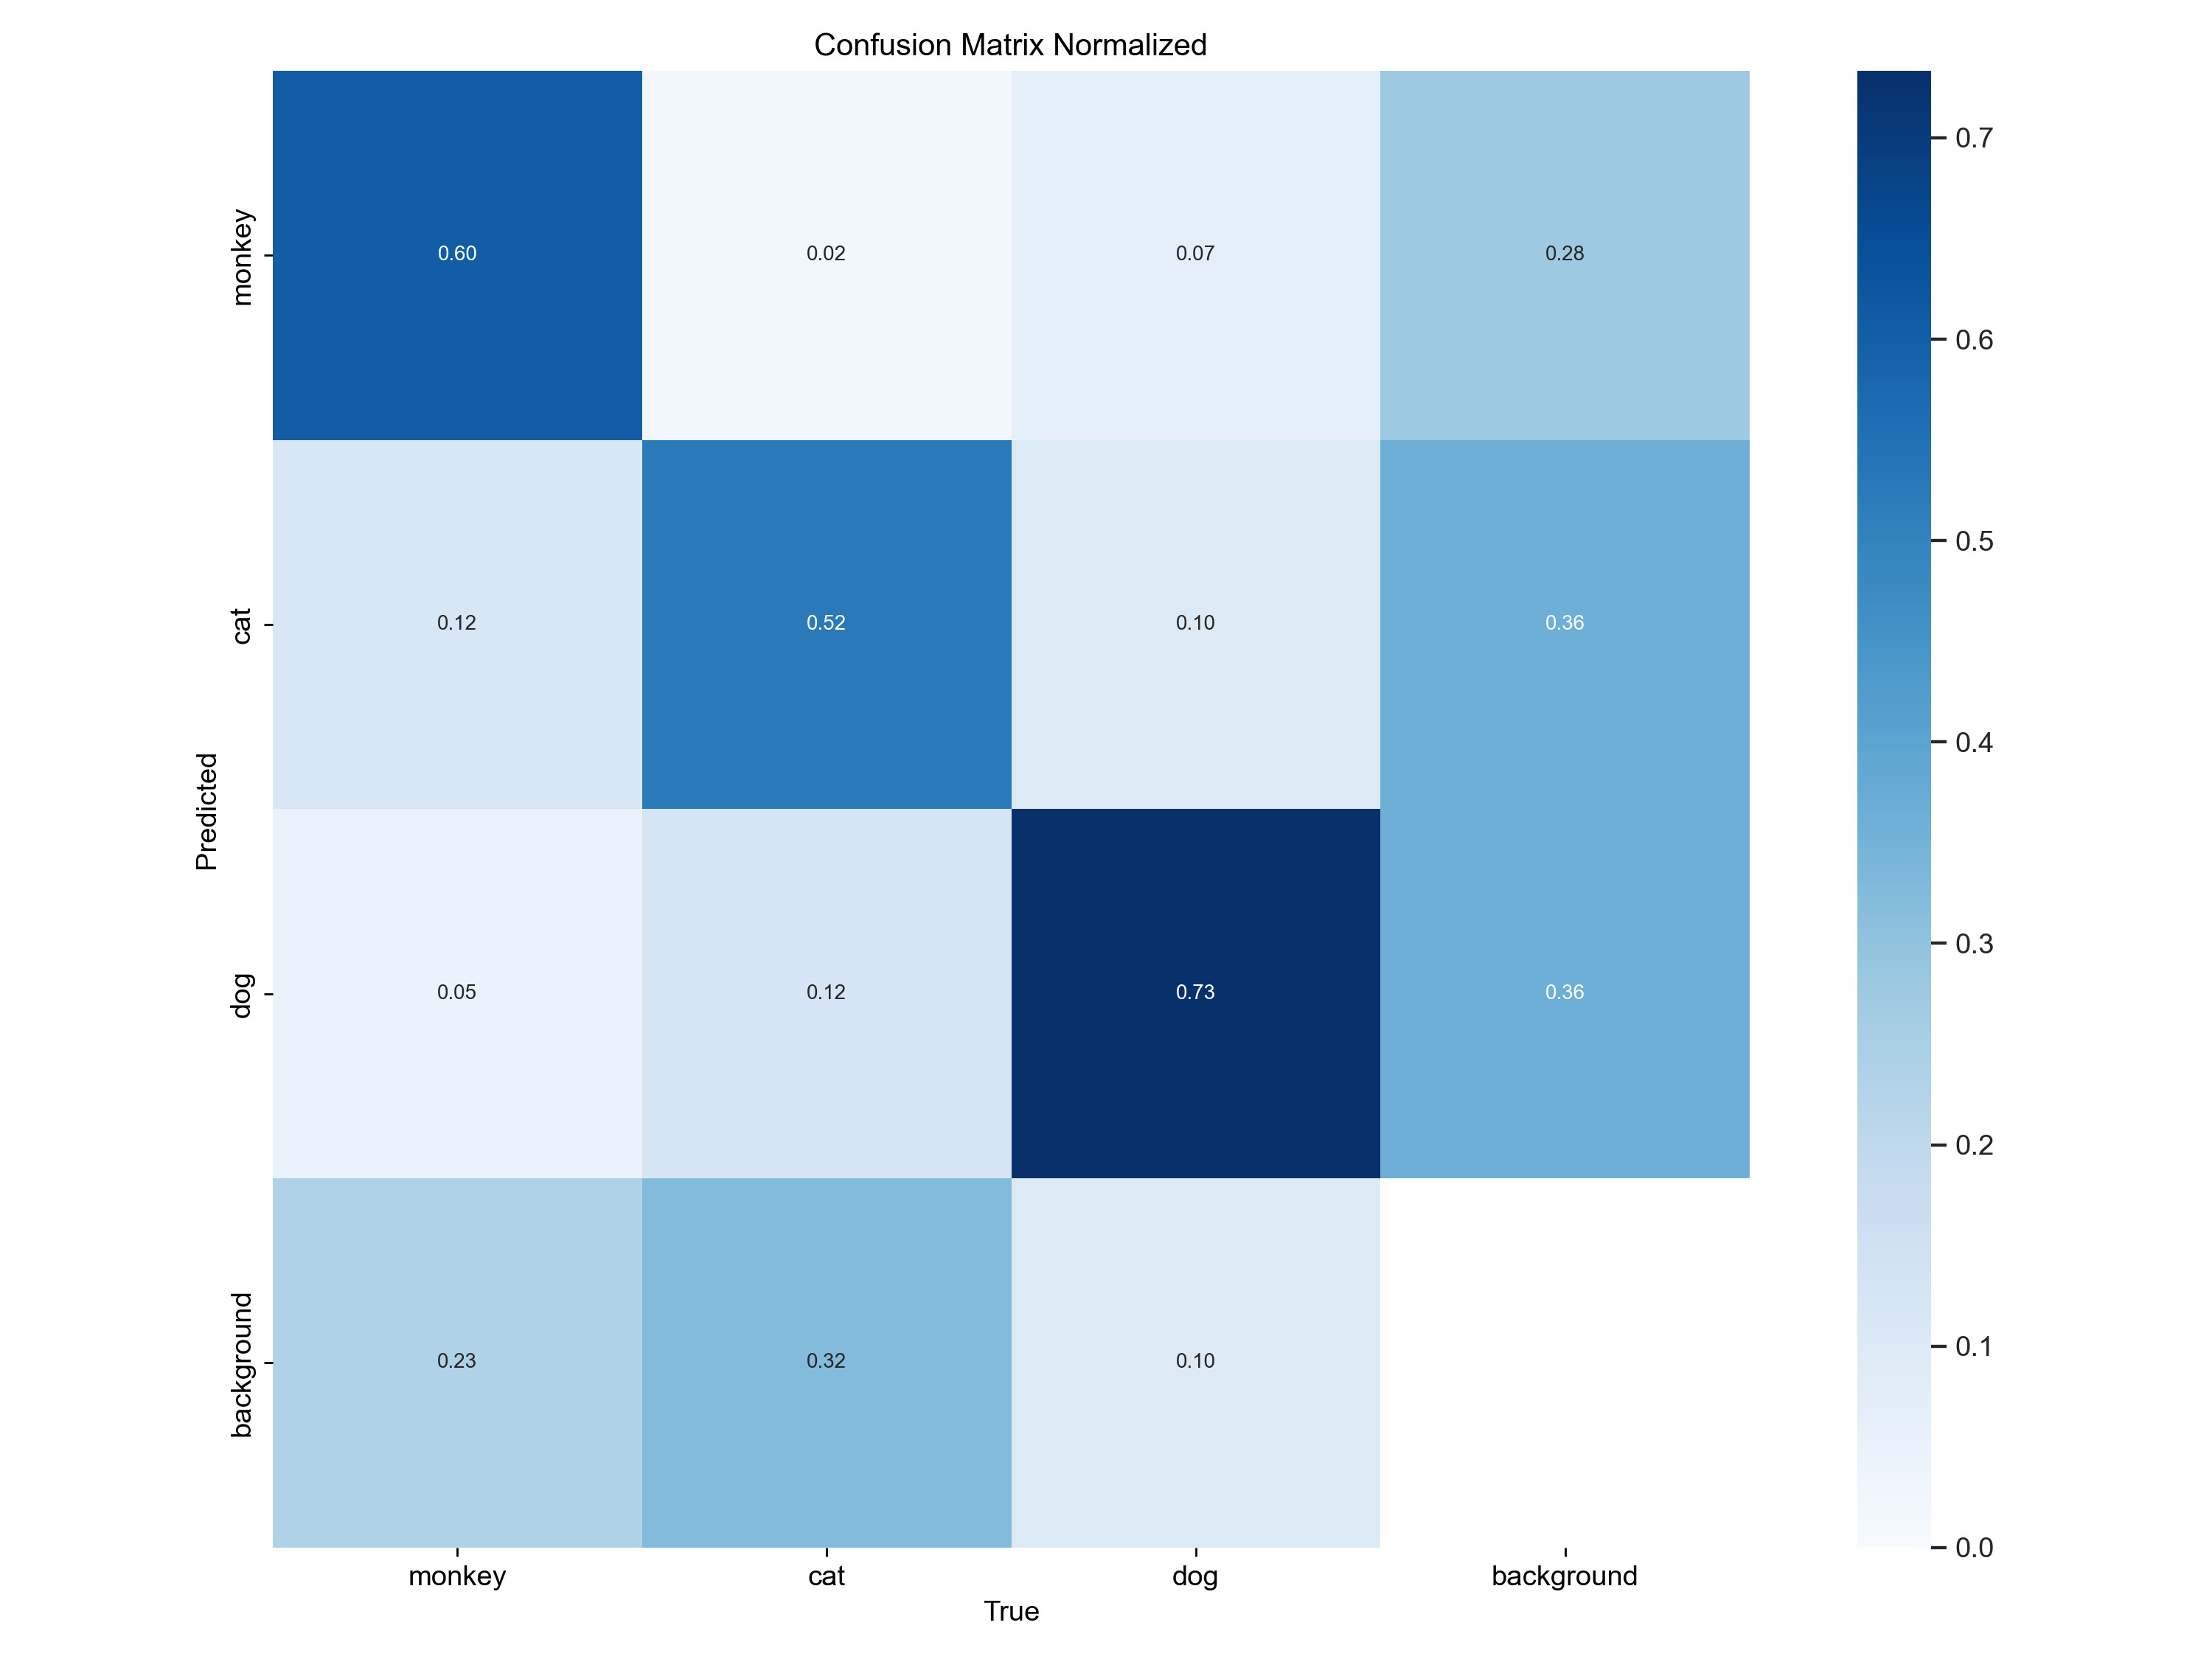

In [9]:
# Confusion matrix
Image('runs/detect/train/confusion_matrix_normalized.png', width=800)

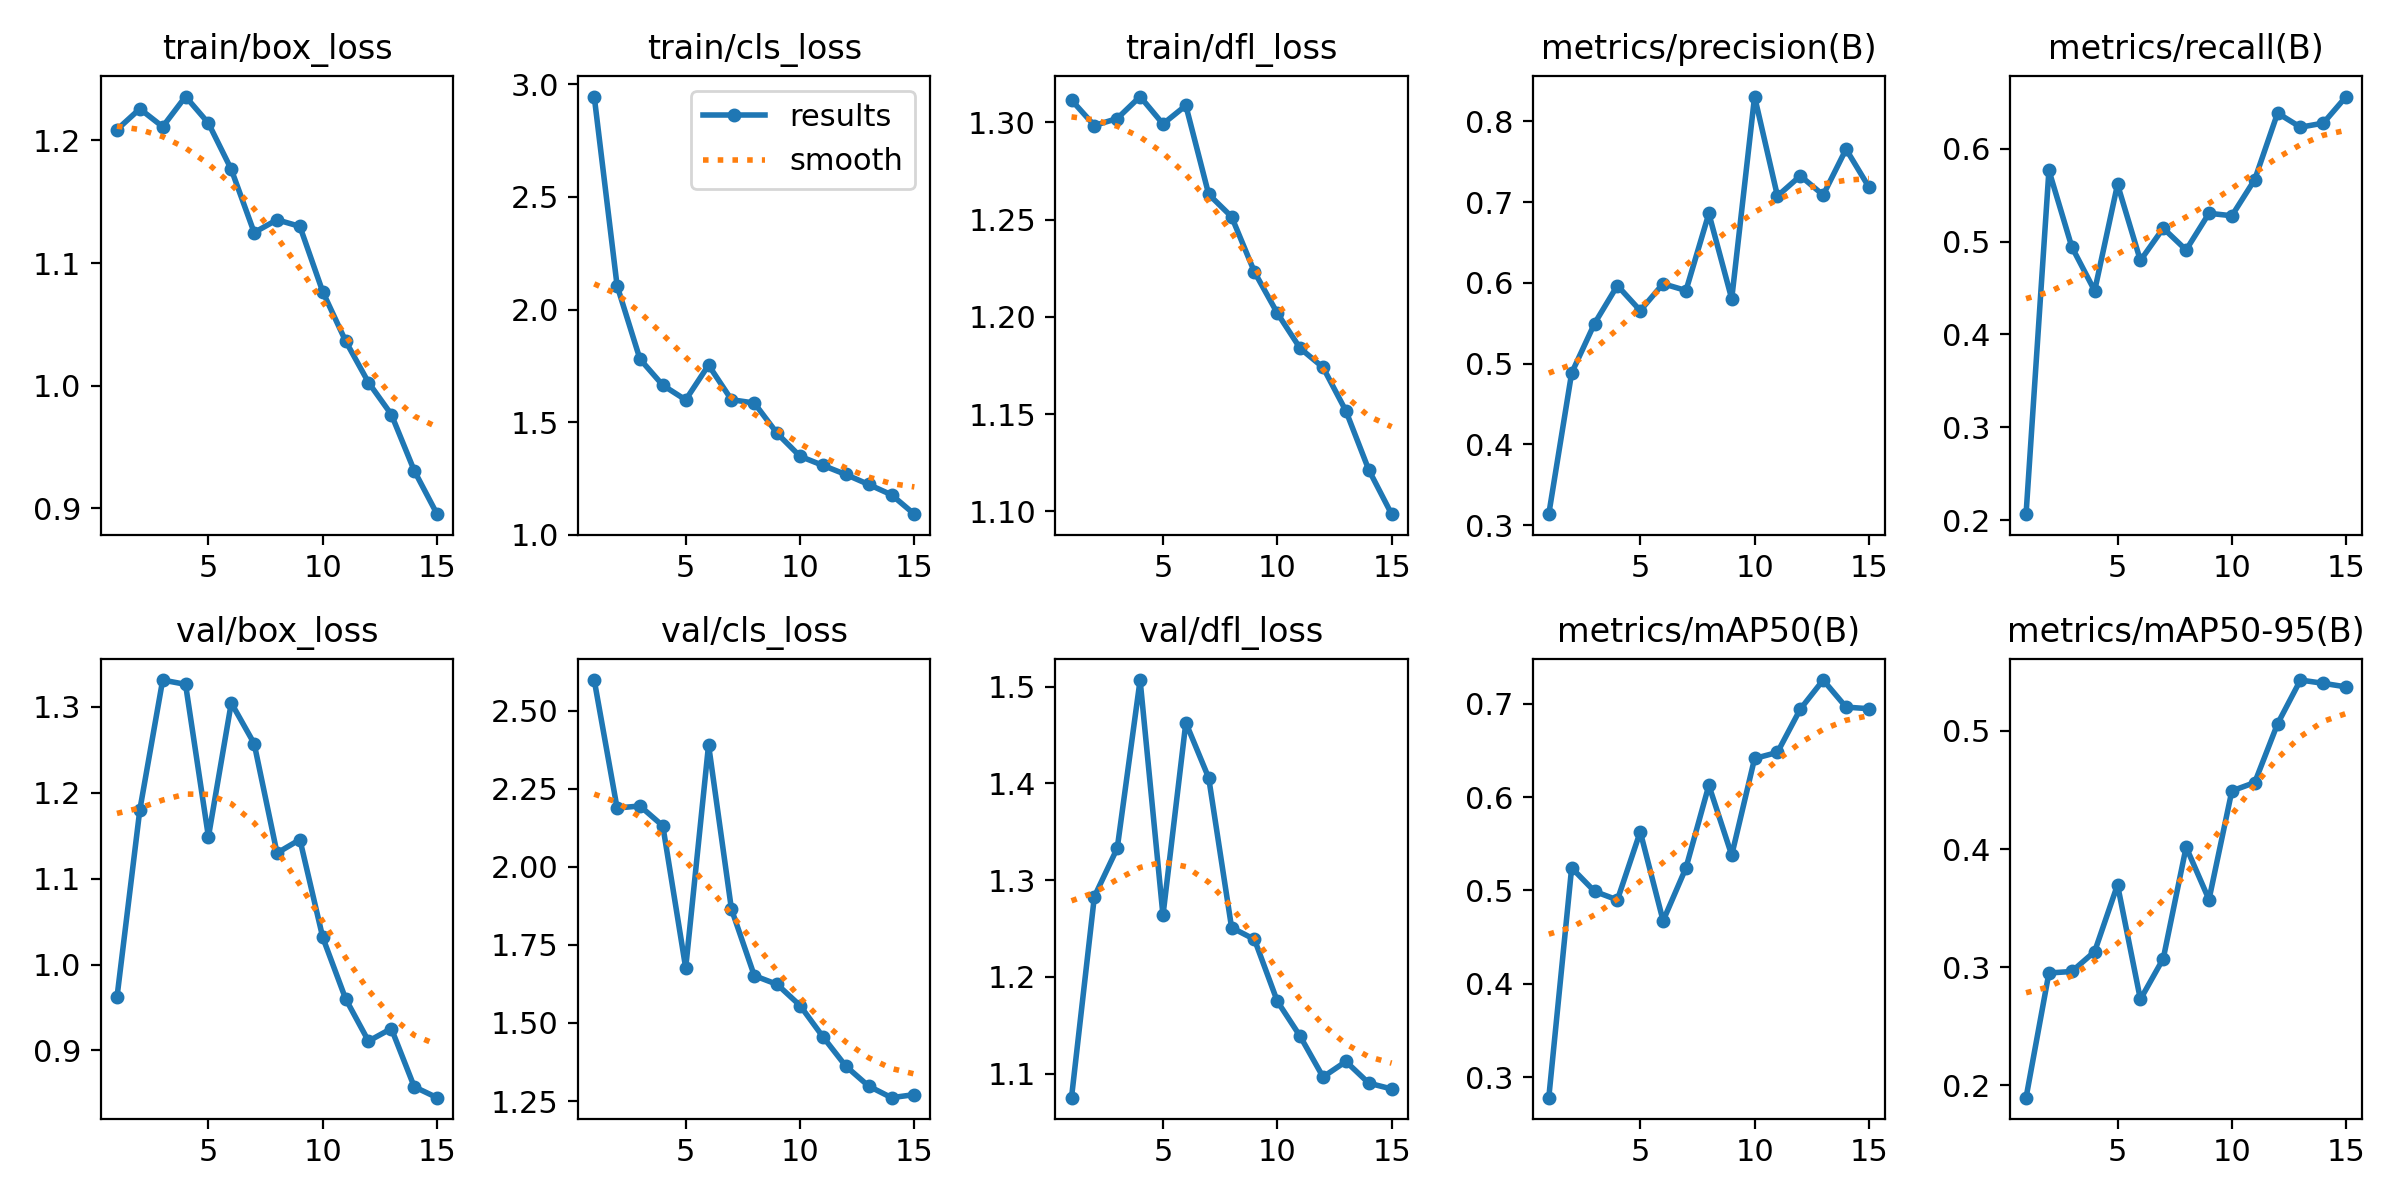

In [10]:
# Results
Image('runs/detect/train/results.png', width=800)

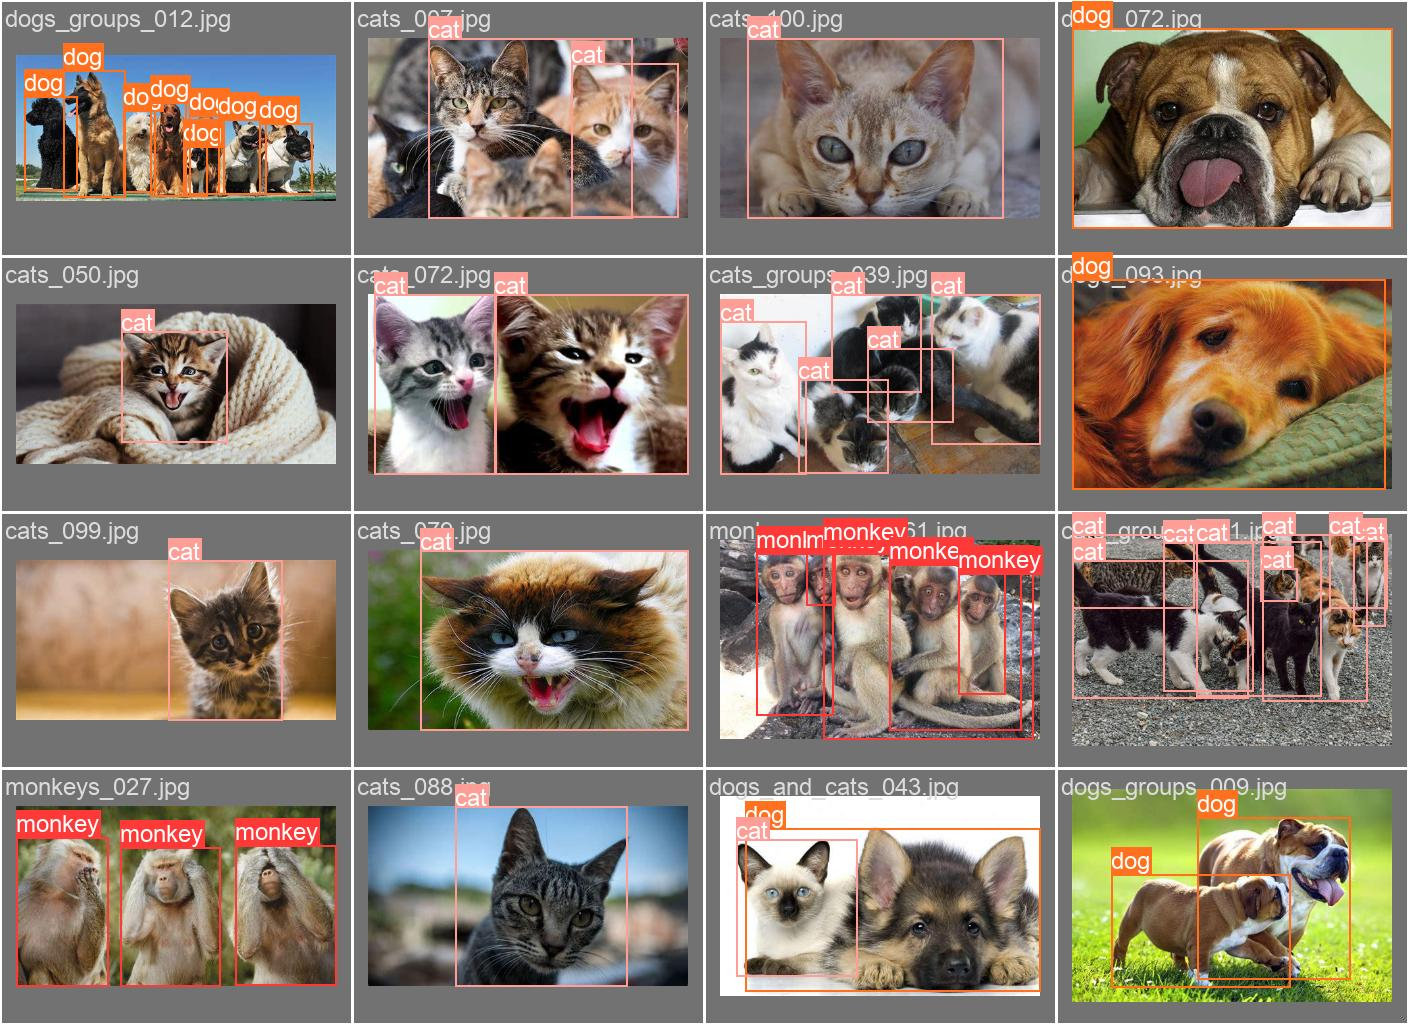

In [11]:
# Show labels
Image('runs/detect/train/val_batch0_labels.jpg', width=800)

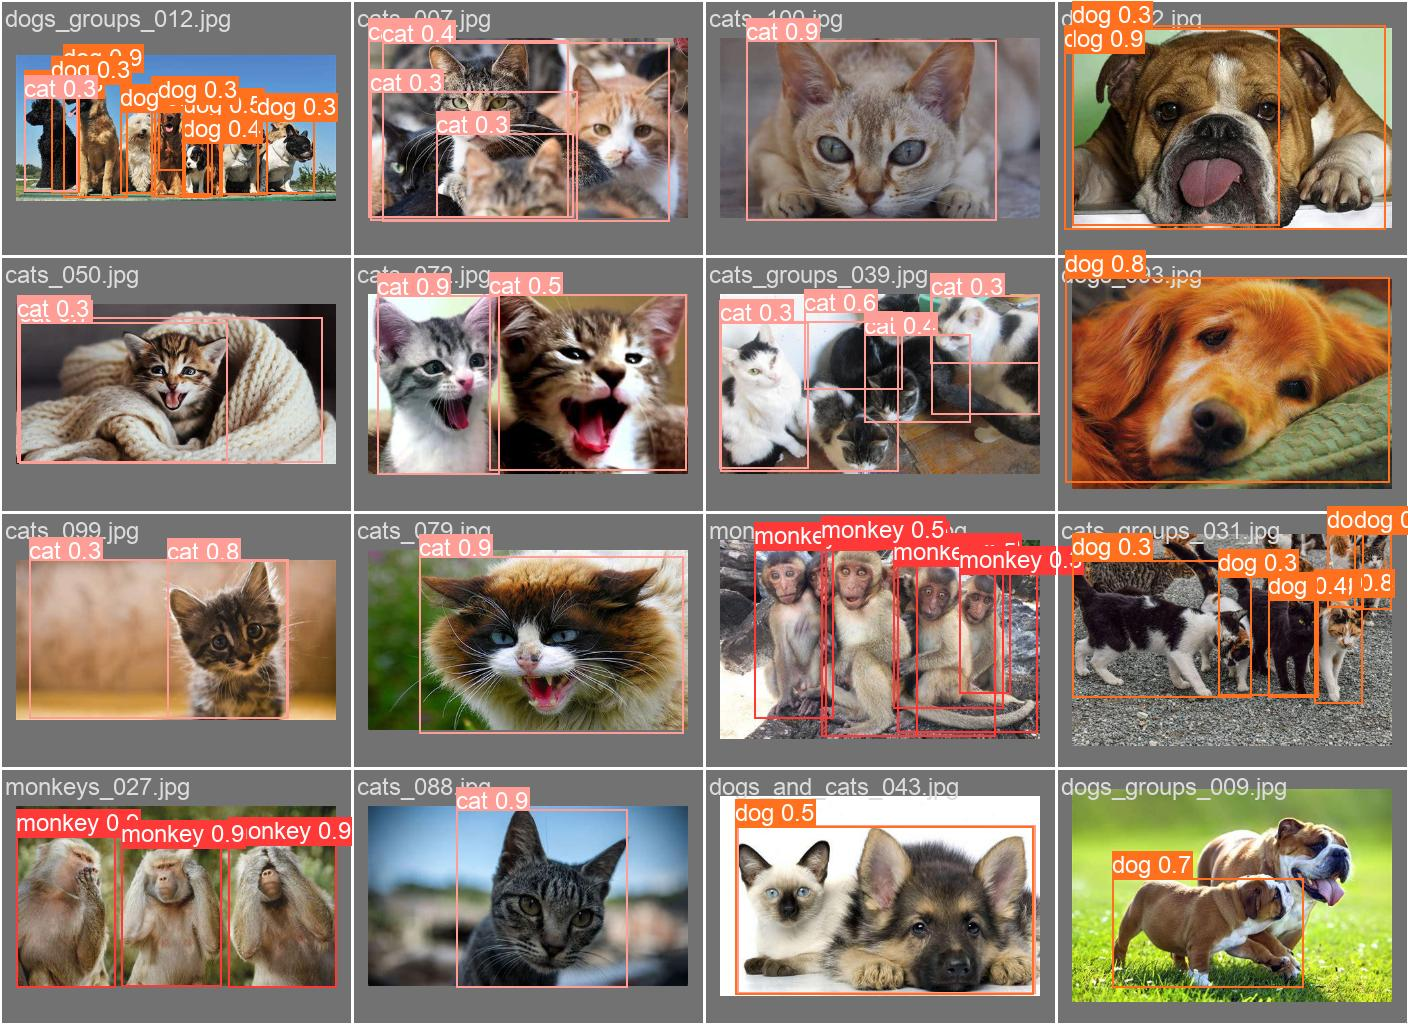

In [12]:
# Show predictions
Image('runs/detect/train/val_batch0_pred.jpg', width=800)

# YOLOv8

In [13]:
# Download YOLO v8 pretrained model
model_v8 = YOLO("yolov8n.pt")

In [14]:
# Training with 15 epochs and image resized to 320
model_v8.train(data="data.yaml", epochs=15, imgsz=320)

Ultralytics YOLOv8.1.1 🚀 Python-3.9.18 torch-2.1.2 CPU (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=15, time=None, patience=50, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, forma

train: Scanning /Users/nguyenvietthai/Library/CloudStorage/OneDrive-EPITA/S3. Computer Vision & Image Analysis/DSA-Computer-Vision/Lab_02/data/train/labels.cache... 469 images, 0 backgrounds, 0 corrupt: 100%|██████████| 469/469 [00:00<?, ?it/s]
val: Scanning /Users/nguyenvietthai/Library/CloudStorage/OneDrive-EPITA/S3. Computer Vision & Image Analysis/DSA-Computer-Vision/Lab_02/data/val/labels.cache... 51 images, 0 backgrounds, 0 corrupt: 100%|██████████| 51/51 [00:00<?, ?it/s]

Plotting labels to runs/detect/train2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15         0G      1.154      2.832      1.293         29        320: 100%|██████████| 30/30 [01:00<00:00,  2.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.50s/it]

                   all         51        113      0.533      0.229      0.315      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15         0G      1.189      2.009      1.312         24        320: 100%|██████████| 30/30 [00:54<00:00,  1.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

                   all         51        113       0.43      0.548      0.474      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15         0G      1.231      1.744      1.334         19        320: 100%|██████████| 30/30 [00:57<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]

                   all         51        113      0.586      0.545      0.608      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15         0G      1.227      1.704      1.363         33        320: 100%|██████████| 30/30 [00:56<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]

                   all         51        113      0.607      0.513      0.545       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/15         0G      1.203       1.61      1.331         28        320: 100%|██████████| 30/30 [00:56<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]

                   all         51        113      0.374      0.449       0.37      0.261
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/15         0G      1.191      1.772      1.283          6        320: 100%|██████████| 30/30 [00:55<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

                   all         51        113      0.658      0.504      0.572      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       7/15         0G      1.078      1.541      1.239         17        320: 100%|██████████| 30/30 [00:53<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.41s/it]

                   all         51        113      0.622      0.441      0.559      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       8/15         0G      1.139      1.556      1.262         31        320: 100%|██████████| 30/30 [00:56<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]

                   all         51        113      0.698      0.522      0.657      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15         0G      1.078      1.479       1.23         26        320: 100%|██████████| 30/30 [00:55<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.46s/it]

                   all         51        113      0.796      0.545      0.664      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15         0G      1.069      1.383      1.213         11        320: 100%|██████████| 30/30 [00:53<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.42s/it]

                   all         51        113      0.671      0.603      0.651      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      11/15         0G     0.9946      1.289      1.176         11        320: 100%|██████████| 30/30 [00:54<00:00,  1.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

                   all         51        113      0.791       0.58      0.674      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15         0G     0.9871      1.297      1.182         13        320: 100%|██████████| 30/30 [00:53<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

                   all         51        113      0.738      0.588      0.667       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      13/15         0G     0.9513      1.205      1.156         13        320: 100%|██████████| 30/30 [00:56<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

                   all         51        113      0.771      0.577      0.731      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      14/15         0G     0.8921      1.106      1.114         15        320: 100%|██████████| 30/30 [00:55<00:00,  1.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.94s/it]

                   all         51        113      0.858      0.604      0.782      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15         0G     0.8477      1.025      1.105         10        320: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.49s/it]

                   all         51        113      0.758      0.671      0.772      0.593

15 epochs completed in 0.249 hours.


Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.1 🚀 Python-3.9.18 torch-2.1.2 CPU (Apple M1 Pro)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]


                   all         51        113      0.759       0.69      0.773      0.593
                monkey         51         43      0.895      0.594      0.759      0.601
                   cat         51         40      0.693      0.575      0.678      0.516
                   dog         51         30       0.69        0.9      0.884       0.66
Speed: 0.3ms preprocess, 53.1ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x2dcab8a00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [15]:
# Export model
model_v8.export(format='onnx')

Ultralytics YOLOv8.1.1 🚀 Python-3.9.18 torch-2.1.2 CPU (Apple M1 Pro)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train2/weights/best.pt' with input shape (1, 3, 320, 320) BCHW and output shape(s) (1, 7, 2100) (5.9 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 0.5s, saved as 'runs/detect/train2/weights/best.onnx' (11.6 MB)

Export complete (0.7s)
Results saved to /Users/nguyenvietthai/Library/CloudStorage/OneDrive-EPITA/S3. Computer Vision & Image Analysis/DSA-Computer-Vision/Lab_02/runs/detect/train2/weights
Predict:         yolo predict task=detect model=runs/detect/train2/weights/best.onnx imgsz=320  
Validate:        yolo val task=detect model=runs/detect/train2/weights/best.onnx imgsz=320 data=data.yaml  
Visualize:       https://netron.app


'runs/detect/train2/weights/best.onnx'

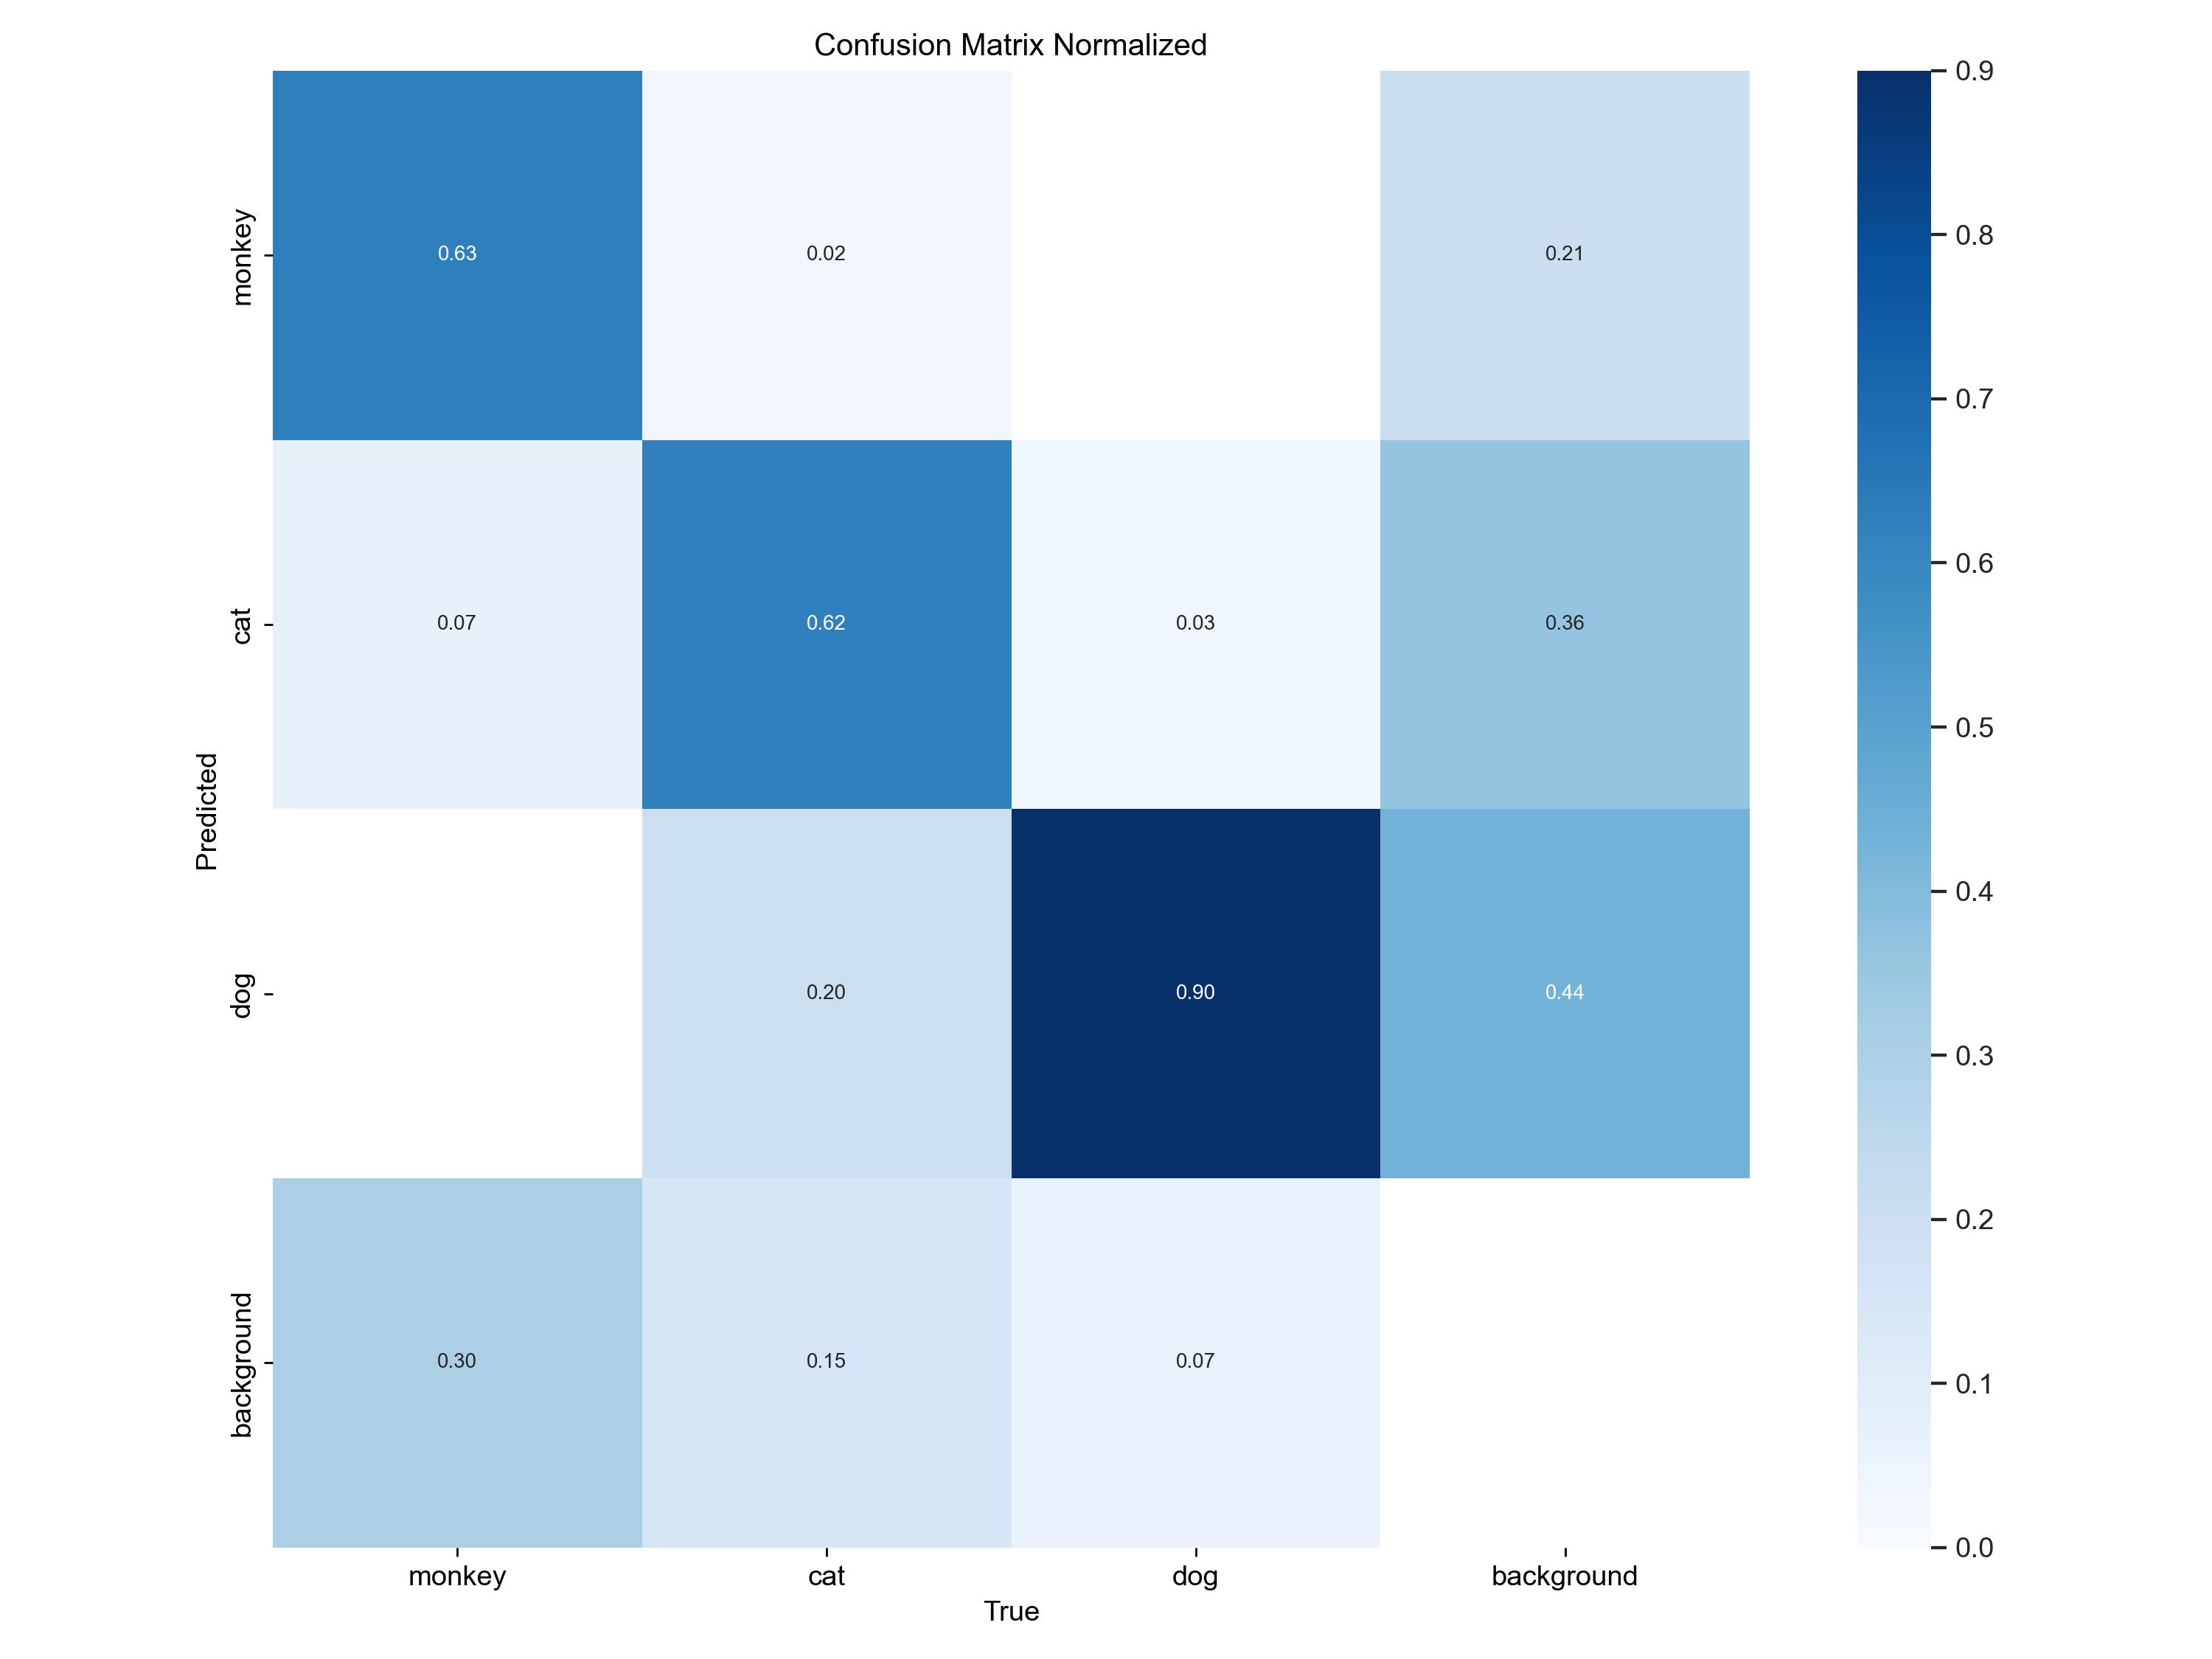

In [16]:
# Confusion matrix
Image('runs/detect/train2/confusion_matrix_normalized.png', width=800)

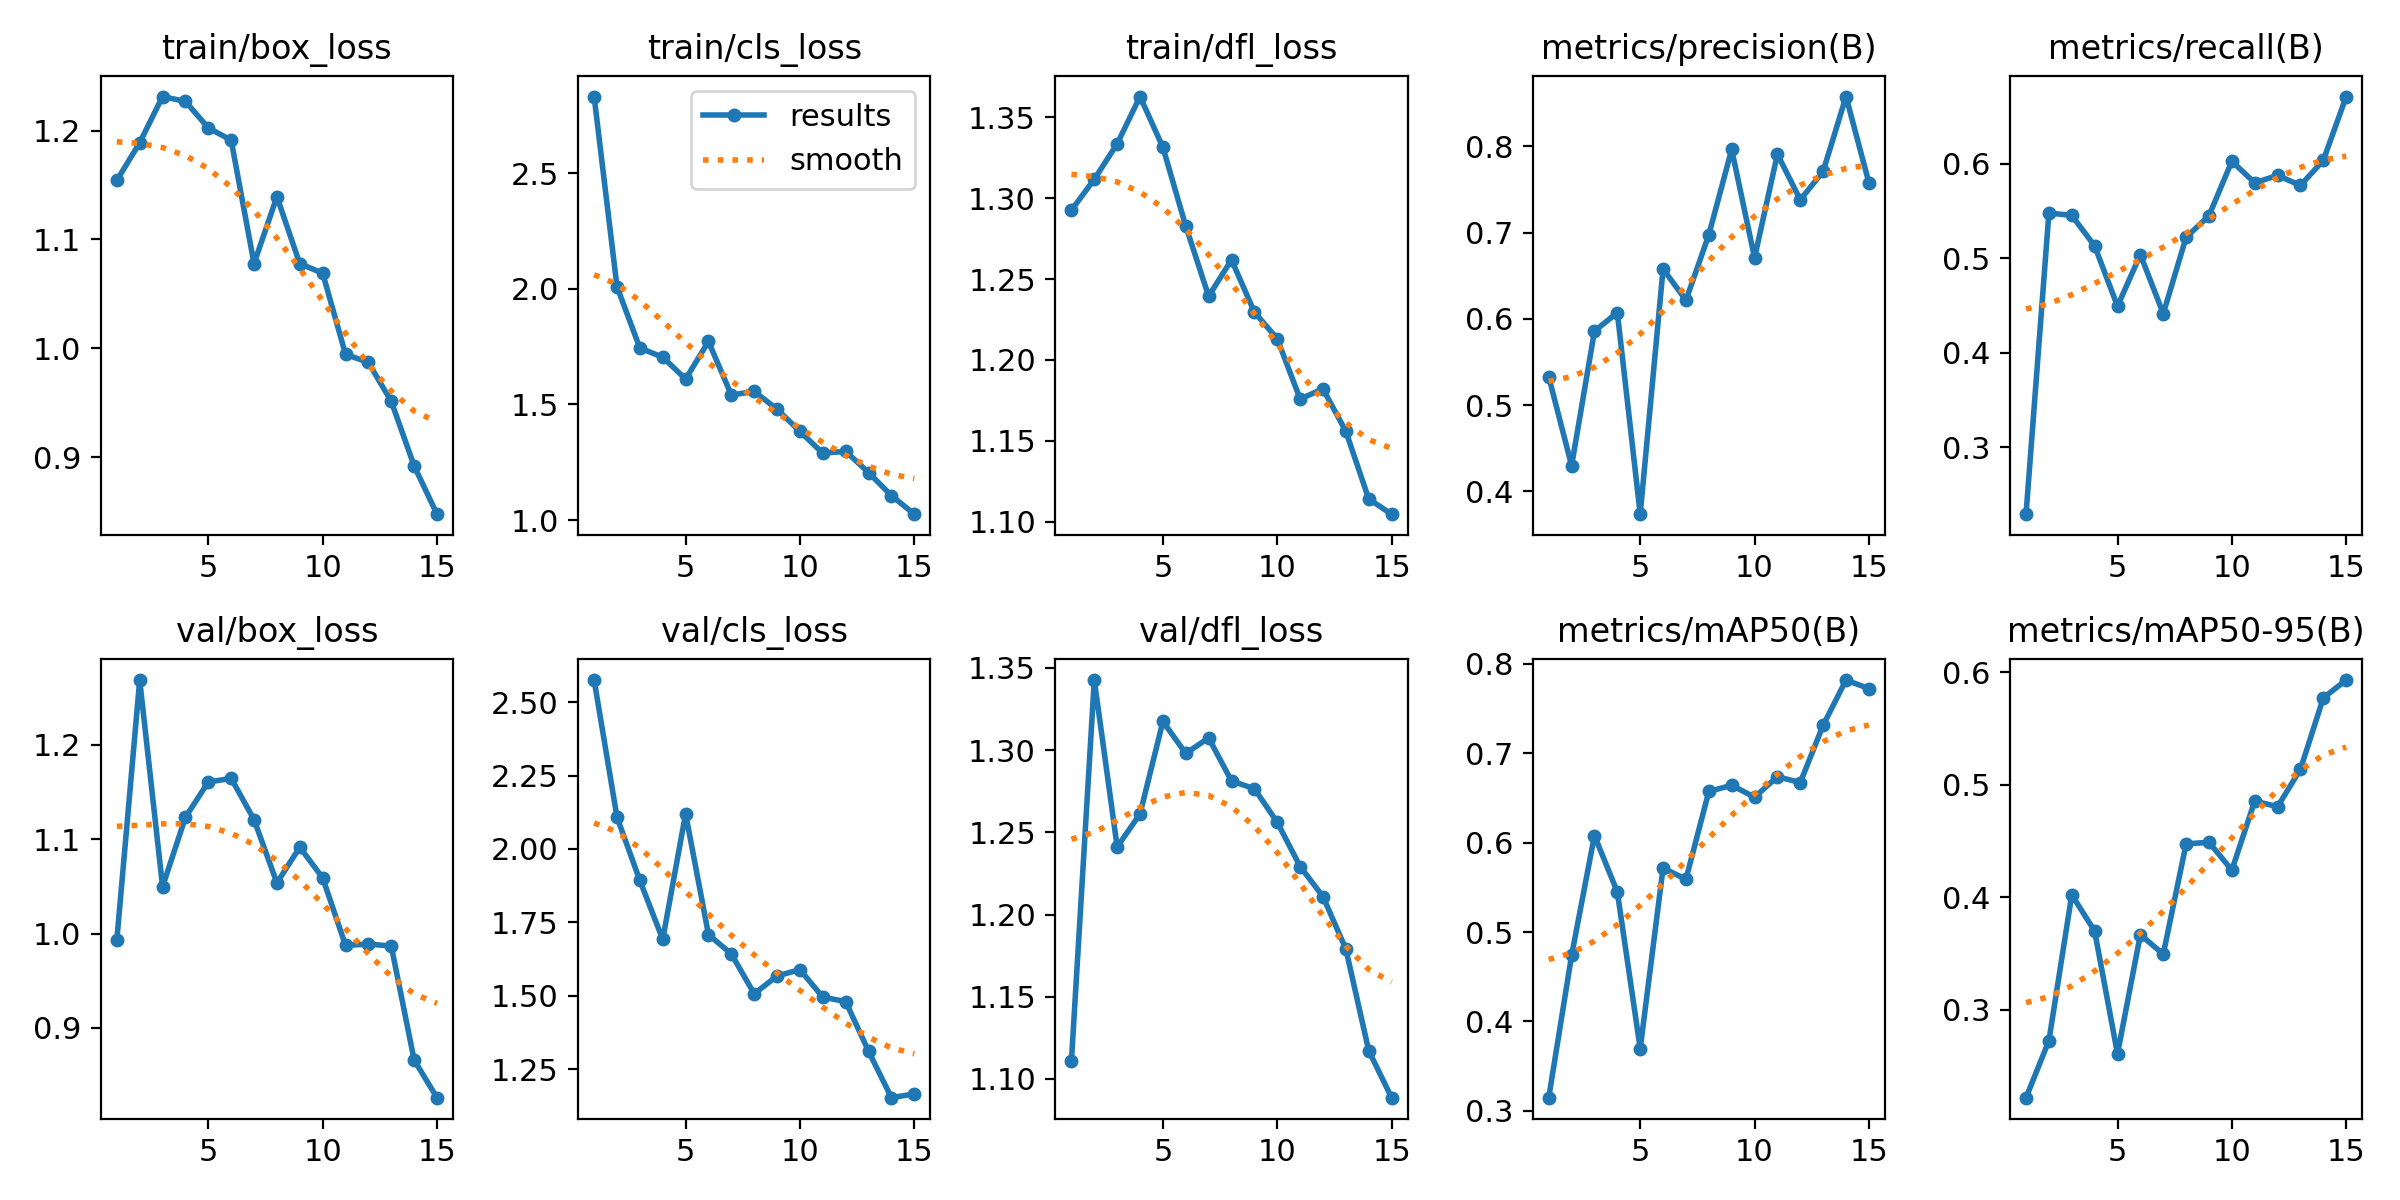

In [17]:
# Results
Image('runs/detect/train2/results.png', width=800)

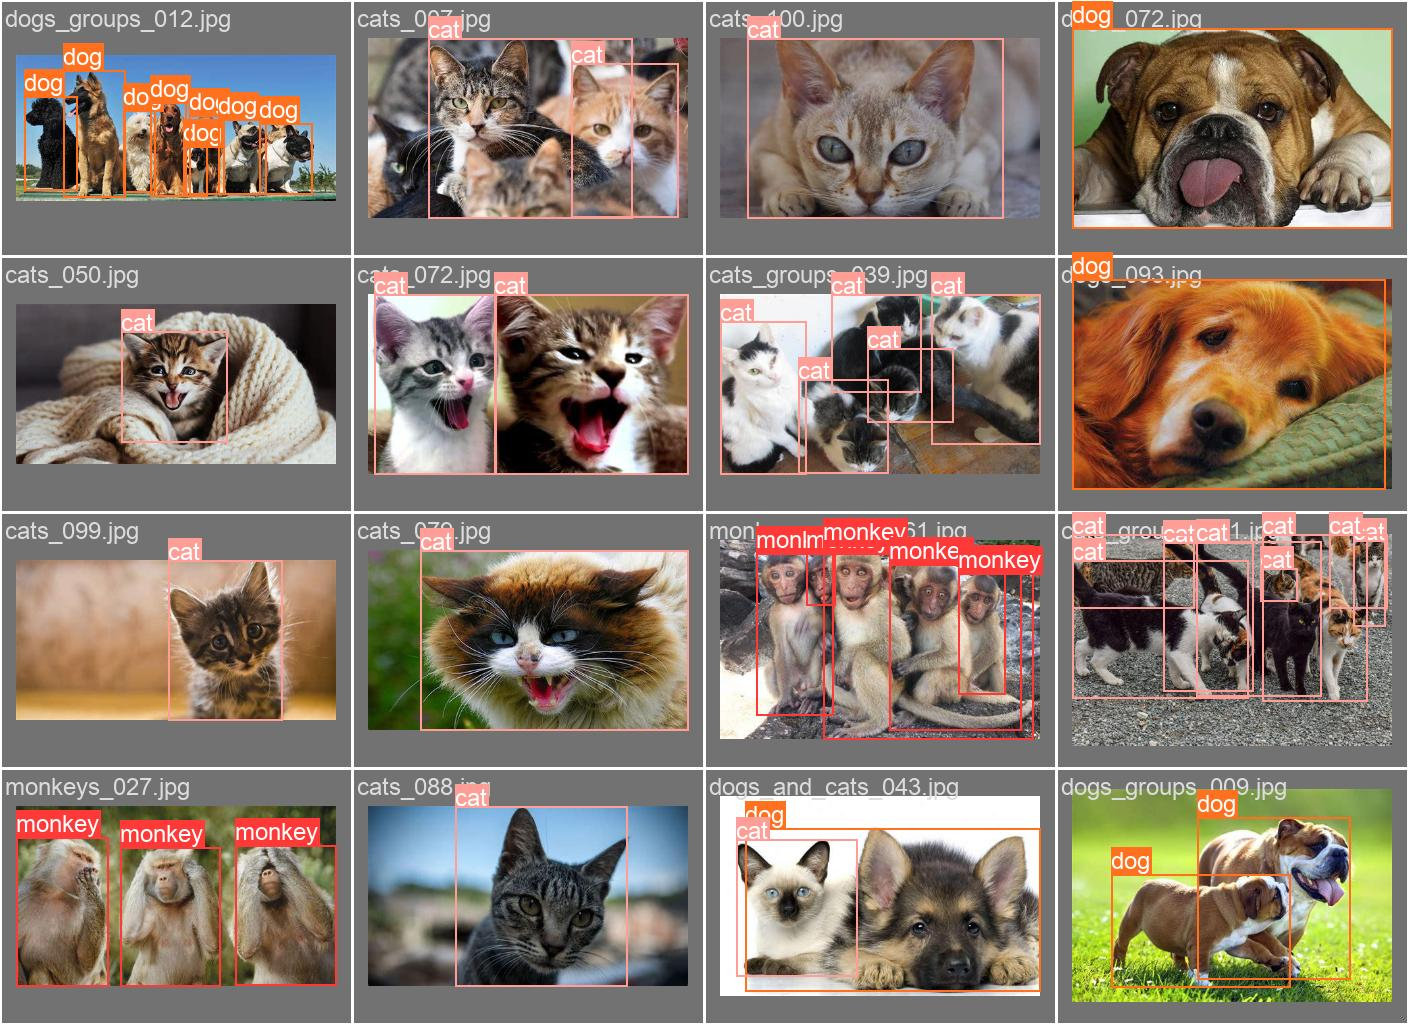

In [18]:
# Show labels
Image('runs/detect/train2/val_batch0_labels.jpg', width=800)

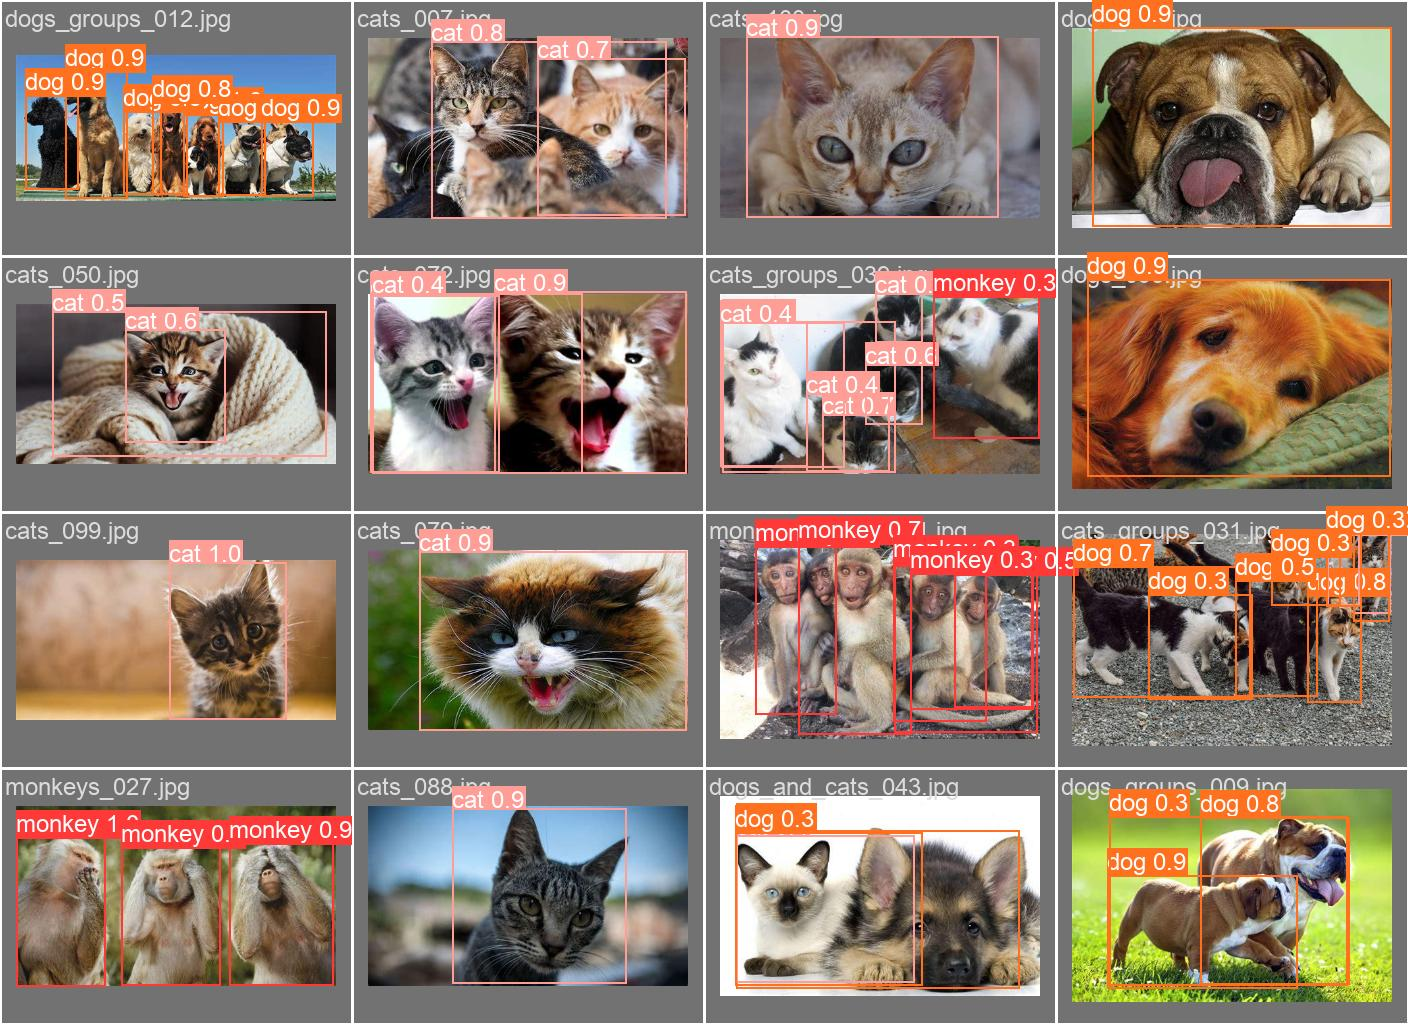

In [19]:
# Show predictions
Image('runs/detect/train2/val_batch0_pred.jpg', width=800)

# Conclusion

### Compare YOLOv5 and YOLOv8
- We can see that the accuracy of 2 models is not really high. It still can be improved by increasing number of epochs.
- YOLOv5 (baseline): 
    - Box loss: 0.8952
    - Class loss: 1.092
    - Prediction: 0.707
    - Recall: 0.623
    - mAP50: 0.725
    - mAP50-95: 0.542 
- YOLOv8:
    - Box loss: 0.8477
    - Class loss: 1.025
    - Prediction: 0.759
    - Recall: 0.690
    - mAP50: 0.773
    - mAP50-95: 0.593

> In terms of overall performance, YOLOv8 all outperformed YOLOv5. I take the best model from YOLOv8 to use for image inference in Streamlit app

### Object Detection App by Streamlit

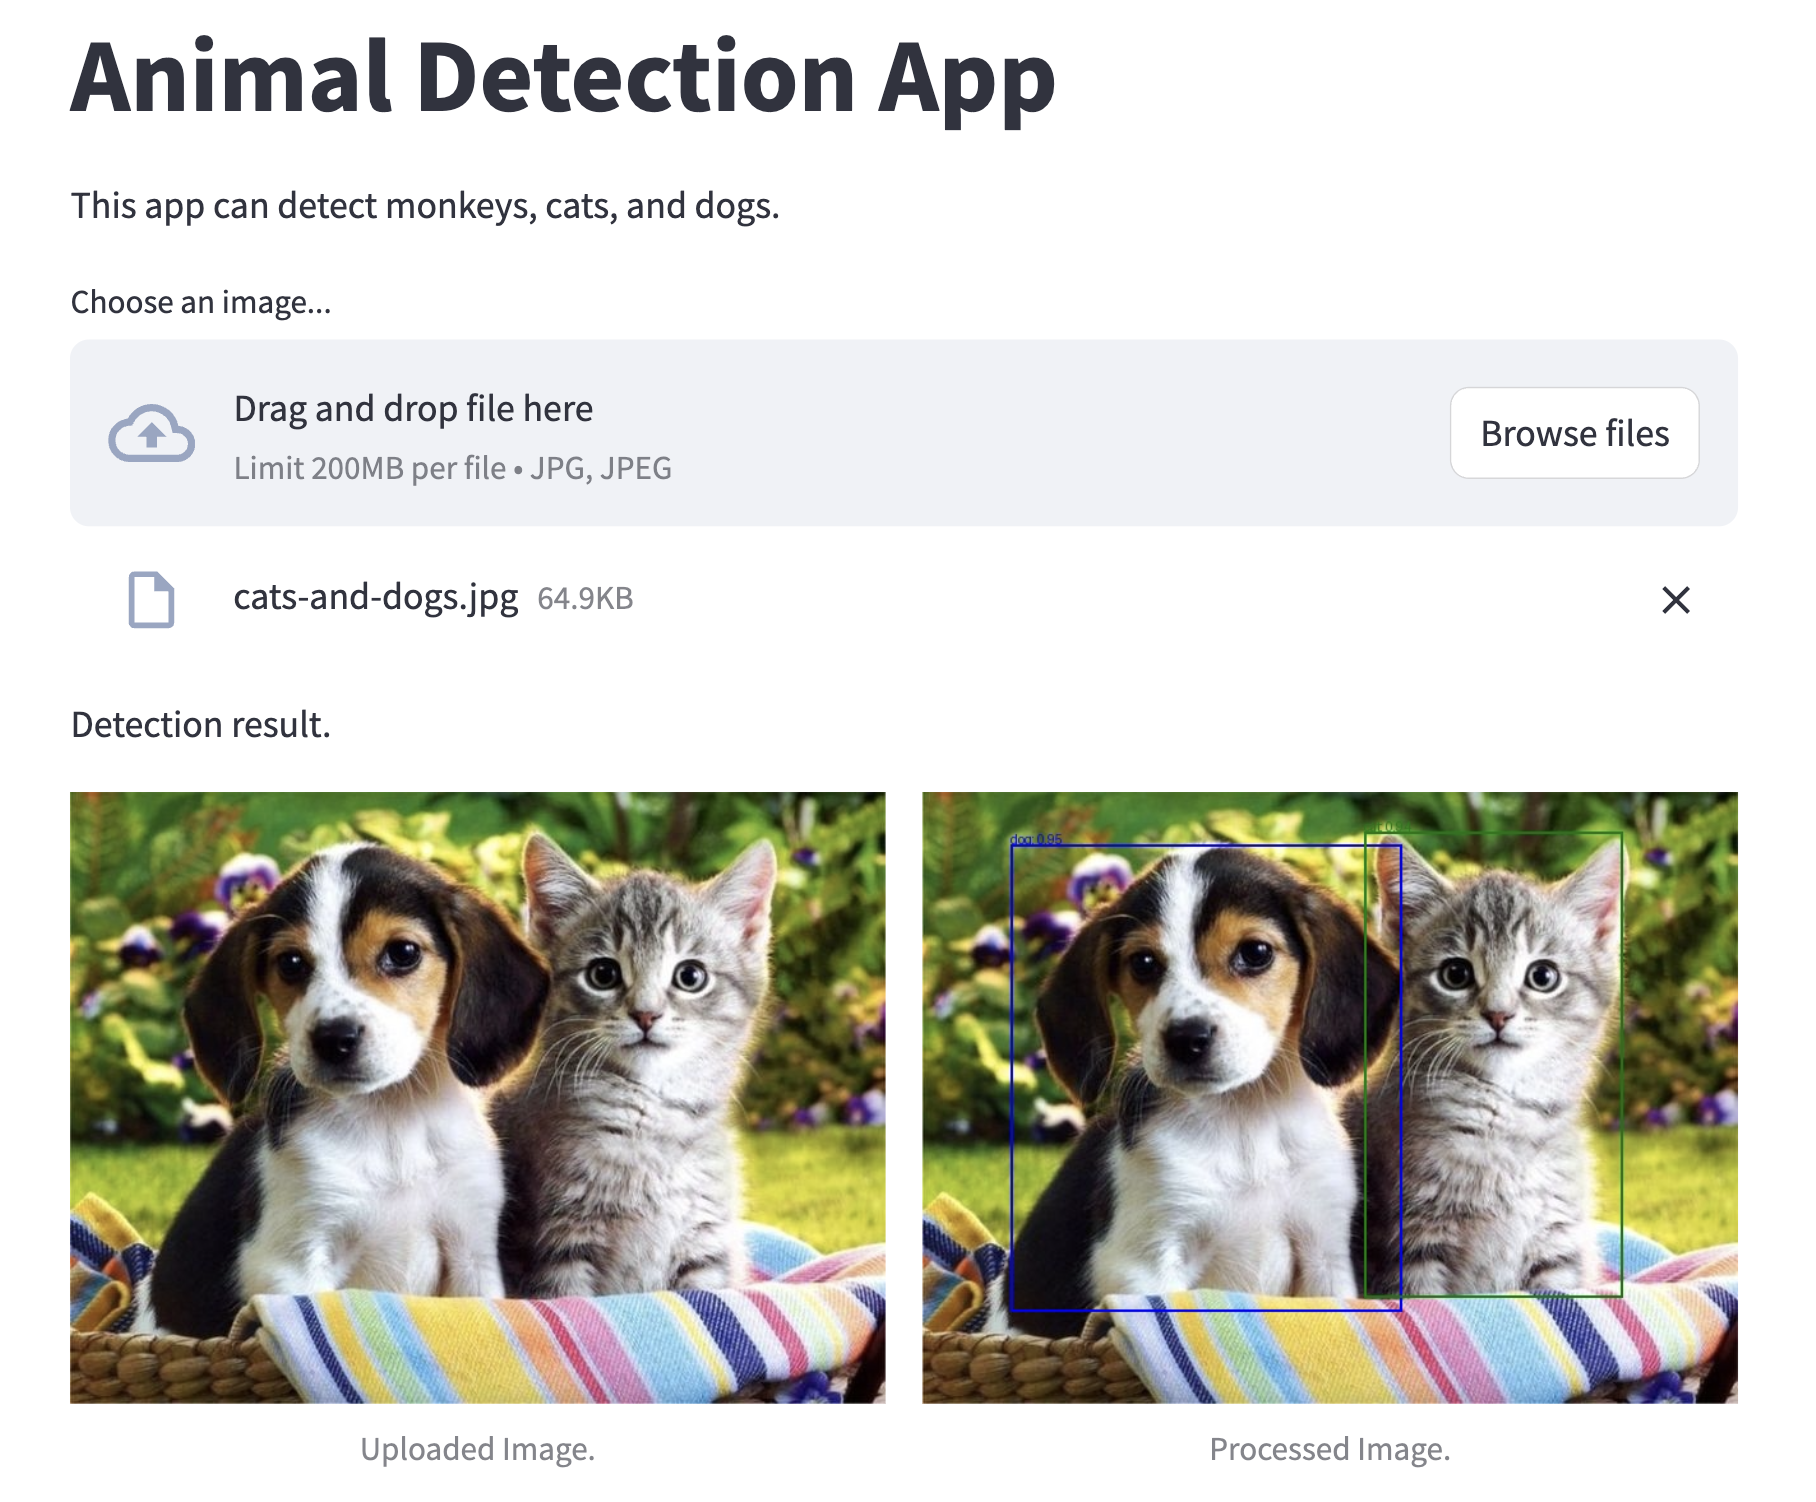

In [20]:
# Show detection in Streamlit app
Image("streamlit.png", width=800)

> From the test image above, the model can draw boxes around the animal with the result `Dog = 0.95`, `Cat = 0.94`